In [1]:
import pandas as pd

In [11]:
prices = pd.read_csv("prices.csv")
prices

,time,best_bid,best_offer,bid_quote_size,offer_quote_size,cbrt_price,sqrt_price,weighted_price,square_price,midpoint_price,update_type,order_id,side,update_price,quantity
0,15940391,0.00,0.00,0,0,NaN,NaN,NaN,NaN,0.000,ORDER,8666950736454519970,1,99.73,12392
1,16008542,99.73,0.00,12392,0,99.7300,99.7300,99.7300,99.7300,49.865,ORDER,7830473398329584235,1,99.75,8572
2,17324711,99.75,0.00,8572,0,99.7500,99.7500,99.7500,99.7500,49.875,ORDER,6596215520014520569,1,99.77,6136
3,17333025,99.77,0.00,6136,0,99.7700,99.7700,99.7700,99.7700,49.885,ORDER,12773036425364501071,1,99.79,6038
4,17340633,99.79,0.00,6038,0,99.7900,99.7900,99.7900,99.7900,49.895,ORDER,1578077864713675715,1,99.78,7640
5,17347865,99.79,0.00,6038,0,99.7900,99.7900,99.7900,99.7900,49.895,ORDER,3064826511487819227,1,99.82,1480
6,17354856,99.82,0.00,1480,0,99.8200,99.8200,99.8200,99.8200,49.910,ORDER,17831171566178307870,1,99.83,442
7,17362778,99.83,0.00,442,0,99.8300,99.8300,99.8300,99.8300,49.915,ORDER,16756544548020634088,1,99.84,591
8,17372941,99.84,0.00,591,0,99.8400,99.8400,99.8400,99.8400,49.920,ORDER,17523492353399223511,1,99.80,3742
9,17380258,99.84,0.00,591,0,99.8400,99.8400,99.8400,99.8400,49.920,ORDER,8515654841458417221,1,99.85,457


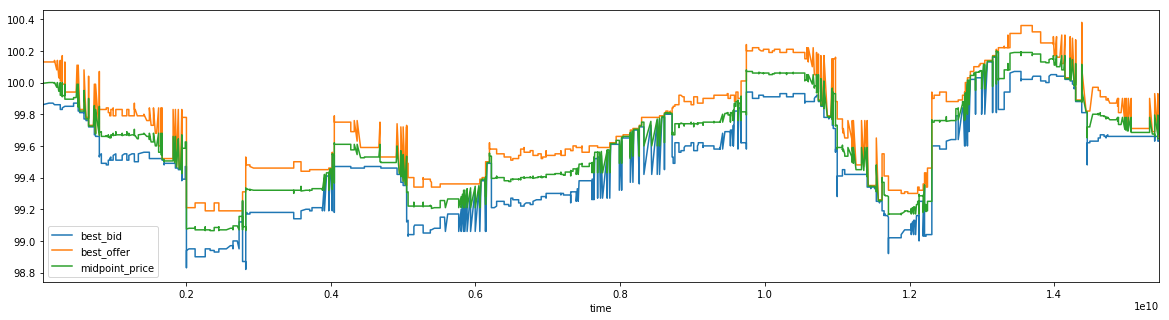

In [38]:
%matplotlib inline
prices.query("best_bid > 0 and best_offer > 0").plot(figsize=(20,5), x="time", y=["best_bid", "best_offer", "midpoint_price"])

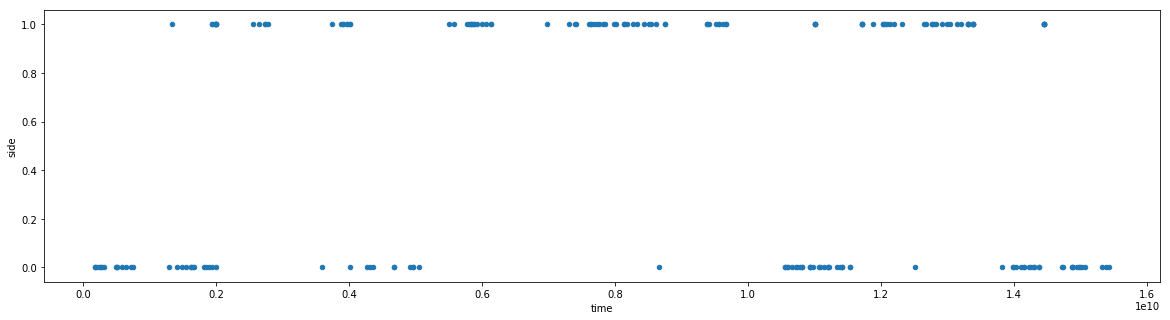

In [56]:
big_buys.plot(figsize=(20,5), kind="scatter", x="time", y="side")
#small.plot(figsize=(20,5), x="time", y=["bid_ewma", "offer_ewma"])
#prices.query("best_bid > 0 and best_offer > 0").plot(figsize=(20,5), x="time", y=["bid_quote_size", "offer_quote_size"])

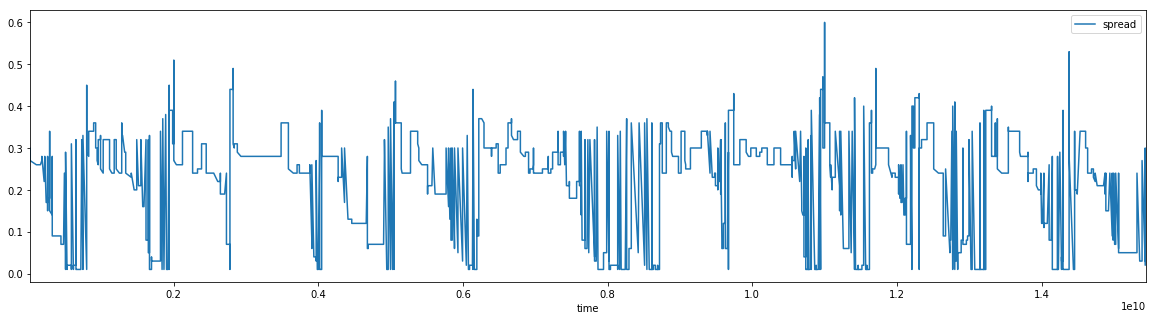

In [39]:
prices["spread"] = prices["best_offer"] - prices["best_bid"]
prices.query("best_bid > 0 and best_offer > 0").plot(figsize=(20,5), x="time", y=["spread"])

In [19]:
small = prices.drop(["order_id"],axis=1)

In [46]:
small["bid_ewma"] = small["bid_quote_size"].ewm(halflife=3).mean()
small["offer_ewma"] = small["offer_quote_size"].ewm(halflife=3).mean()

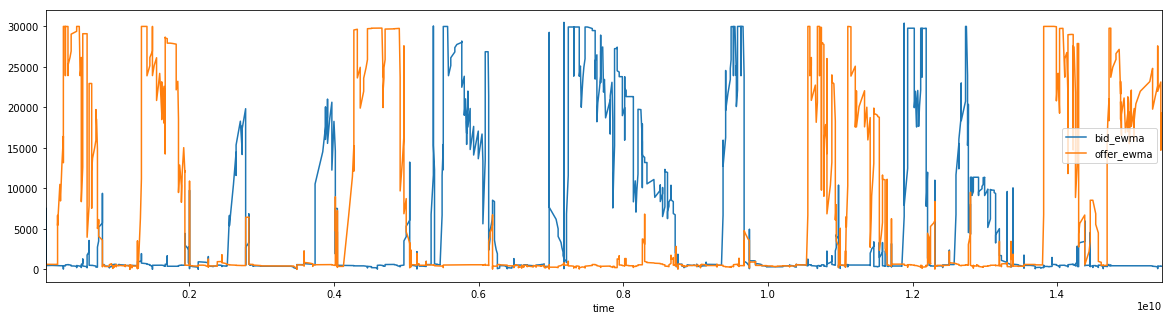

In [50]:
big_buys = prices.query("update_type == 'ORDER' and quantity > 1000 and update_price < best_offer and update_price > best_bid")

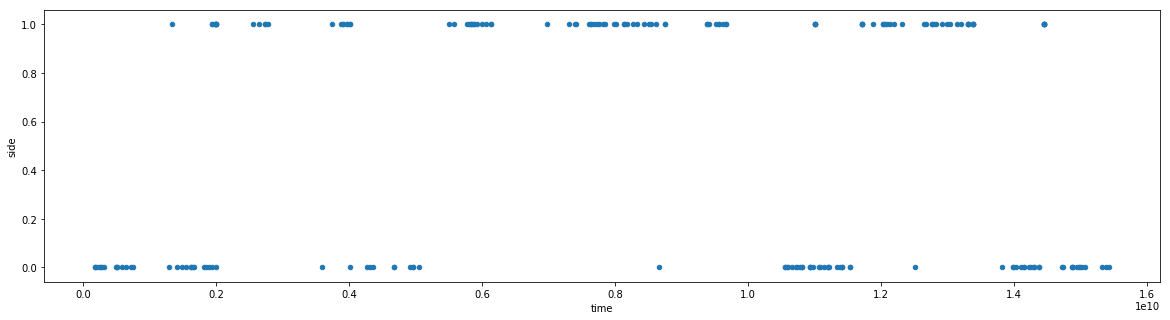

In [55]:
big_buys.plot(figsize=(20,5), kind="scatter", x="time", y="side")